In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

**과제 1: 알고리즘 성능 비교**

Iris 데이터로 5가지 알고리즘 모두 실습

→ 정확도와 속도를 표로 정리

In [21]:
# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

#X_train # 특징 4개: sepal length, sepal width, petal length, petal width
#_train # 클래스 3개: setosa(0), versicolor(1), virginica(2)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

# 모델 생성
tree = DecisionTreeClassifier(
    criterion='gini',        # 또는 'entropy'
    max_depth=3,             # 최대 깊이
    min_samples_split=5,     # 분할 최소 샘플
    min_samples_leaf=2,      # 리프 최소 샘플
    random_state=42
)

# 학습 시간 측정
start_fit = time.perf_counter()
tree.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = tree.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")      # 훈련 데이터 정확도
print(f"Test Accuracy  : {test_acc:.3f}")       # 테스트 데이터 정확도
print(f"Fit Time       : {fit_time:.5f} sec")   # 학습 시간
print(f"Predict Time   : {pred_time:.5f} sec")  # 예측 시간


Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00125 sec
Predict Time   : 0.00019 sec


In [15]:
criteria = ['gini', 'entropy']

for c in criteria:
    model = DecisionTreeClassifier(max_depth=3, criterion=c, random_state=42)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{c:<8} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")


gini     | Train: 0.958 | Test: 1.000
entropy  | Train: 0.958 | Test: 1.000


Logistic Regression (로지스틱 회귀)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time

logit =LogisticRegression(max_iter=1000, random_state=42)

# 학습 시간
start_fit = time.perf_counter()
logit.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측
start_pred = time.perf_counter()
y_pred = logit.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
train_acc = accuracy_score(y_train, logit.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.975
Test Accuracy  : 1.000
Fit Time       : 0.01731 sec
Predict Time   : 0.00017 sec


Naive Bayes - 각 특징이 독립이라고 가정하고, 클래스별 확률을 곱해서 가장 높은 확률의 클래스를 예측

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# 모델 생성
nb = GaussianNB()

# 학습 시간 측정
start_fit = time.perf_counter()
nb.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = nb.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
train_acc = accuracy_score(y_train, nb.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00079 sec
Predict Time   : 0.00016 sec


KNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

knn = KNeighborsClassifier(
    n_neighbors=5,     # 이웃 개수
    metric="minkowski",# 거리 척도
    p=2                # p=1: 맨해튼 거리 / p=2: 유클리드 거리
)

# 학습 시간
start_fit = time.perf_counter()
knn.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간
start_pred = time.perf_counter()
y_pred = knn.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc  = accuracy_score(y_test,  y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.967
Test Accuracy  : 1.000
Fit Time       : 0.00112 sec
Predict Time   : 0.00112 sec


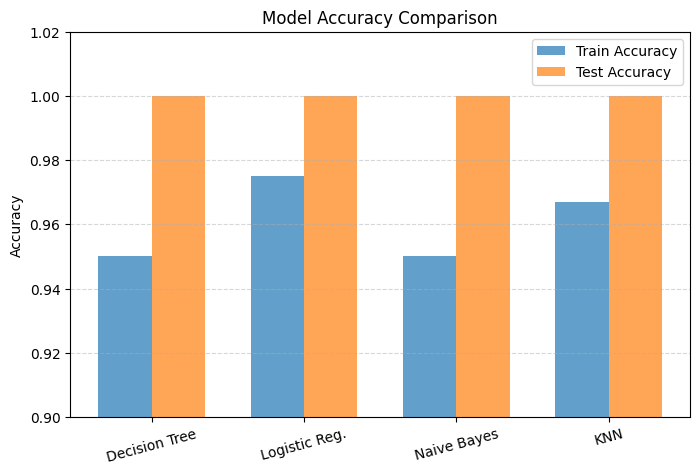
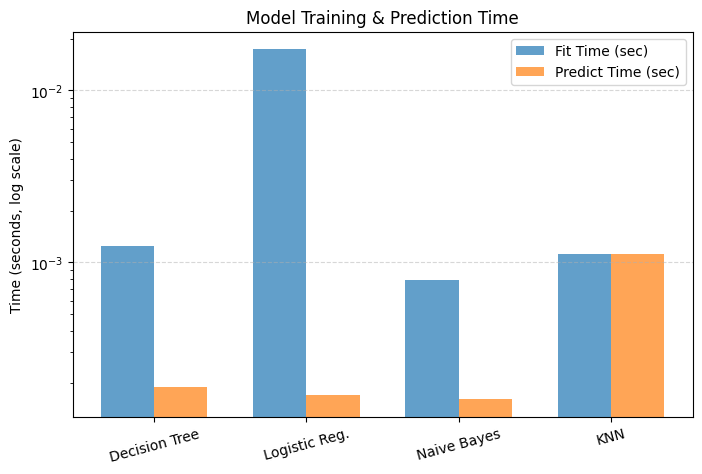

| 모델                      | Train Accuracy | Test Accuracy | Fit Time (sec) | Predict Time (sec) | 특징 요약                             |
| ----------------------- | -------------- | ------------- | -------------- | ------------------ | --------------------------------- |
| **Decision Tree**       | 0.950          | 1.000         | 0.00125        | 0.00019            | 단순하고 빠르며, max_depth 조절로 과적합 제어 가능 |
| **Logistic Regression** | 0.975          | 1.000         | 0.01731        | 0.00017            | 학습 시간은 가장 길지만, 선형 결정 경계를 잘 찾음     |
| **Naive Bayes**         | 0.950          | 1.000         | 0.00079        | 0.00016            | 속도가 매우 빠르며, 확률 기반의 단순 모델          |
| **KNN**                 | 0.967          | 1.000         | 0.00112        | 0.00112            | 단순하지만 데이터 의존적, 예측 시 거리 계산 필요      |


Iris 데이터셋의 클래스 간 구분이 명확하기 때문에, 모든 모델이 Test Accuracy = 1.0으로 매우 높은 정확도를 달성하였다.

속도 측면에서는 Naive Bayes가 가장 빠르며,
로지스틱 회귀(Logistic Regression) 는 반복 최적화 과정으로 인해
상대적으로 학습 시간이 길었다.

KNN은 학습은 빠르지만 예측 시 거리 계산이 필요해 Predict Time이 다른 모델보다 약간 길다.

Decision Tree는 파라미터(max_depth, min_samples_split) 조절을 통해 과적합을 방지할 수 있으며, 시각화로 해석이 용이하다는 장점이 있다.

따라서, 작은 데이터셋에서는 모든 모델이 우수한 성능을 보였지만,
대규모 데이터로 확장할 경우에는
Naive Bayes(속도), Logistic Regression(안정성), Decision Tree(해석력),
KNN(단순성) 등 상황에 맞는 선택이 필요하다.

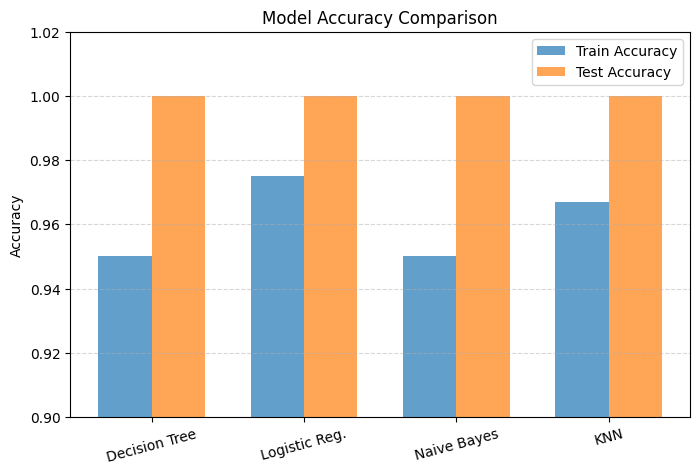

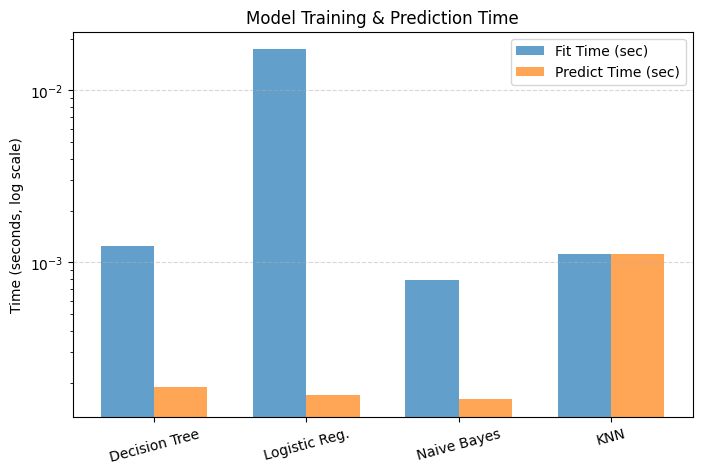

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ["Decision Tree", "Logistic Reg.", "Naive Bayes", "KNN"]

# 실험 결과 입력
train_acc = [0.950, 0.975, 0.950, 0.967]
test_acc  = [1.000, 1.000, 1.000, 1.000]
fit_time  = [0.00125, 0.01731, 0.00079, 0.00112]
pred_time = [0.00019, 0.00017, 0.00016, 0.00112]

x = np.arange(len(models))
width = 0.35

# 정확도 그래프
plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_acc, width, label="Train Accuracy", alpha=0.7)
plt.bar(x + width/2, test_acc, width, label="Test Accuracy", alpha=0.7)
plt.xticks(x, models, rotation=15)
plt.ylim(0.9, 1.02)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 시간 그래프 (Fit / Predict)
plt.figure(figsize=(8,5))
plt.bar(x - width/2, fit_time, width, label="Fit Time (sec)", alpha=0.7)
plt.bar(x + width/2, pred_time, width, label="Predict Time (sec)", alpha=0.7)
plt.xticks(x, models, rotation=15)
plt.yscale('log')  # 시간 차이가 크니까 로그 스케일로
plt.title("Model Training & Prediction Time")
plt.ylabel("Time (seconds, log scale)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**과제 2: Decision Tree 깊이 실험**
max_depth를 1~10까지 바꿔가며 성능 측정

→ 그래프로 시각화

In [4]:
# 데이터 로드
iris2 = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris2.data, iris2.target, test_size=0.2, random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
import time

# 모델 생성
tree = DecisionTreeClassifier(
    criterion='gini',        # 또는 'entropy'
    max_depth=3,             # 최대 깊이
    min_samples_split=5,     # 분할 최소 샘플
    min_samples_leaf=2,      # 리프 최소 샘플
    random_state=42
)

# 학습 시간 측정
start_fit = time.perf_counter()
tree.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = tree.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")      # 훈련 데이터 정확도
print(f"Test Accuracy  : {test_acc:.3f}")       # 테스트 데이터 정확도
print(f"Fit Time       : {fit_time:.5f} sec")   # 학습 시간
print(f"Predict Time   : {pred_time:.5f} sec")  # 예측 시간

Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00144 sec
Predict Time   : 0.00025 sec


In [11]:
import matplotlib.pyplot as plt

depths = range(1, 11)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    print(f"depth={d:2d} | Train: {train_scores[-1]:.3f} | Test: {test_scores[-1]:.3f}")



depth= 1 | Train: 0.675 | Test: 0.633
depth= 2 | Train: 0.950 | Test: 0.967
depth= 3 | Train: 0.958 | Test: 1.000
depth= 4 | Train: 0.975 | Test: 1.000
depth= 5 | Train: 0.992 | Test: 1.000
depth= 6 | Train: 1.000 | Test: 1.000
depth= 7 | Train: 1.000 | Test: 1.000
depth= 8 | Train: 1.000 | Test: 1.000
depth= 9 | Train: 1.000 | Test: 1.000
depth=10 | Train: 1.000 | Test: 1.000


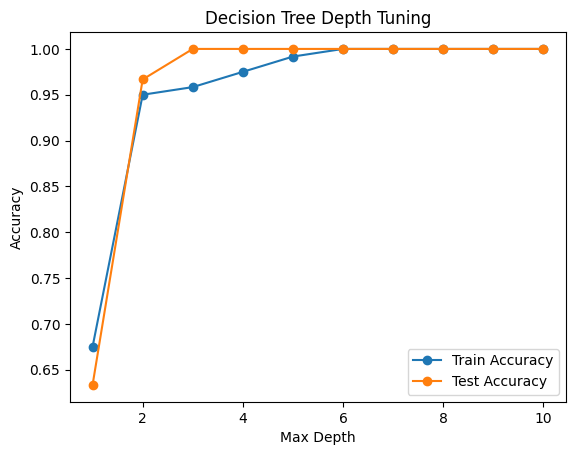

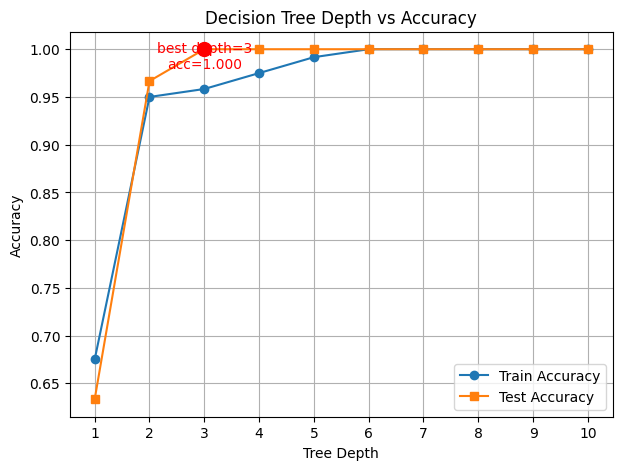

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)

# 최고 Test Accuracy 표시
best_depth = depths[test_scores.index(max(test_scores))]
best_acc = max(test_scores)
plt.scatter(best_depth, best_acc, color='red', s=100, zorder=5)
plt.text(best_depth, best_acc - 0.02, f"best depth={best_depth}\nacc={best_acc:.3f}",
        ha='center', color='red', fontsize=10)

plt.show()


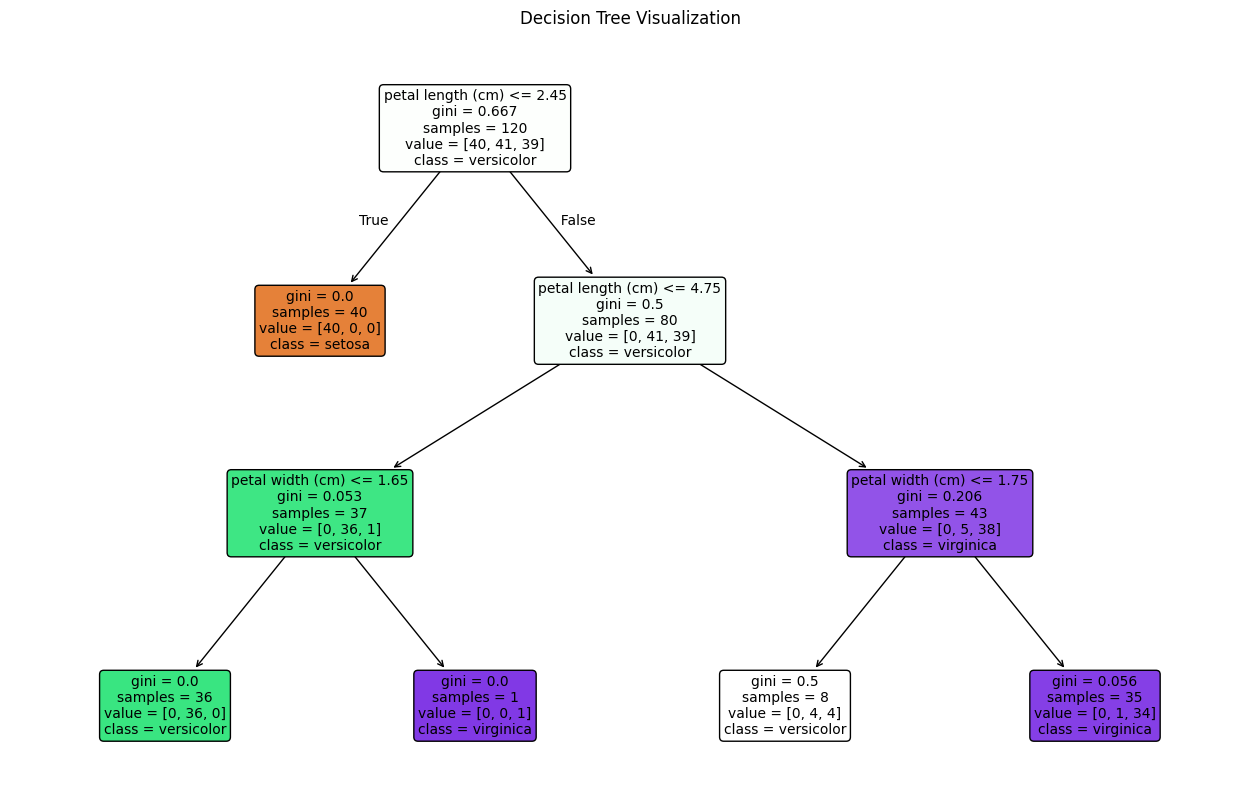

In [38]:
from sklearn.tree import plot_tree

# 최적 깊이(예: 3)로 모델 다시 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,10))
plot_tree(tree,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True,
        fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


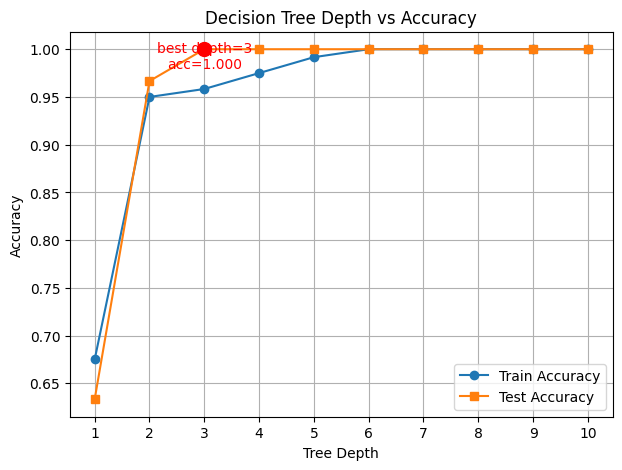

Tree Depth가 1일 때는 iris 모델이 지나치게 단순해,
데이터의 패턴을 충분히 학습하지 못하고, Train/Test 정확도가 모두 낮게 나타난다.

Depth가 증가함에 따라 Train/Test 정확도가 빠르게 향상되며,
Depth=3 부근에서 Test Accuracy가 1.0에 도달한다.

이후 Depth가 더 깊어져도 Test Accuracy는 변화가 거의 없고,
Train Accuracy만 미세하게 증가하는 경향을 보인다.

이는 Depth=3 이후로는 모델이 이미 충분히 학습했음을 의미한다.
더 깊은 트리를 사용하는 것은 과적합(overfitting) 위험을 증가시킬 수 있다.

따라서 최적의 트리 깊이는 약 3 수준이다.

**과제 3: KNN 하이퍼파라미터 튜닝**

K값과 거리 측정 방법을 바꿔가며 실험

→ 최적 조합 찾기

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

knn = KNeighborsClassifier(
    n_neighbors=5,     # 이웃 개수
    metric="minkowski",# 거리 척도
    p=2                # p=1: 맨해튼 거리 / p=2: 유클리드 거리
)

# 학습 시간
start_fit = time.perf_counter()
knn.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간
start_pred = time.perf_counter()
y_pred = knn.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc  = accuracy_score(y_test,  y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.967
Test Accuracy  : 1.000
Fit Time       : 0.00069 sec
Predict Time   : 0.00087 sec


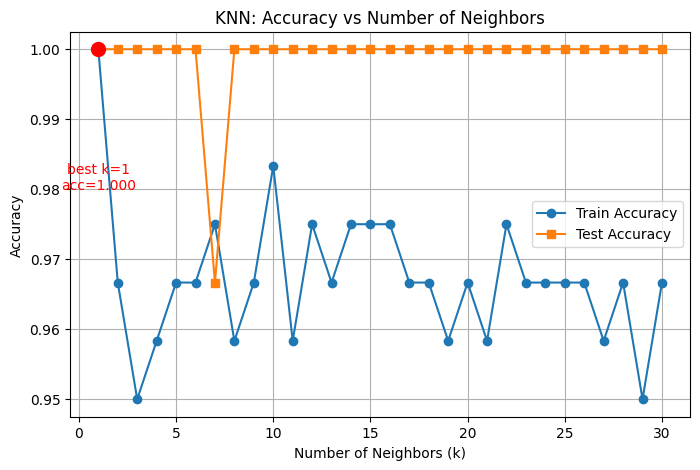

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
k_values = range(1, 31)  # k=1~30 시도

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# 시각화
plt.figure(figsize=(8,5))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)

# 최고 Test Accuracy 표시
best_k = k_values[test_scores.index(max(test_scores))]
best_acc = max(test_scores)
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)
plt.text(best_k, best_acc-0.02, f"best k={best_k}\nacc={best_acc:.3f}",
        ha='center', color='red')

plt.show()


In [35]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 11)
train_scores, test_scores = [], []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    print(f"k={k:2d} | Train: {train_scores[-1]:.3f} | Test: {test_scores[-1]:.3f}")


k= 1 | Train: 1.000 | Test: 1.000
k= 2 | Train: 0.967 | Test: 1.000
k= 3 | Train: 0.950 | Test: 1.000
k= 4 | Train: 0.958 | Test: 1.000
k= 5 | Train: 0.967 | Test: 1.000
k= 6 | Train: 0.967 | Test: 1.000
k= 7 | Train: 0.975 | Test: 0.967
k= 8 | Train: 0.958 | Test: 1.000
k= 9 | Train: 0.967 | Test: 1.000
k=10 | Train: 0.983 | Test: 1.000


In [ ]:
import matplotlib.pyplot as plt

depths = range(1, 11)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    print(f"depth={d:2d} | Train: {train_scores[-1]:.3f} | Test: {test_scores[-1]:.3f}")



depth= 1 | Train: 0.675 | Test: 0.633
depth= 2 | Train: 0.950 | Test: 0.967
depth= 3 | Train: 0.958 | Test: 1.000
depth= 4 | Train: 0.975 | Test: 1.000
depth= 5 | Train: 0.992 | Test: 1.000
depth= 6 | Train: 1.000 | Test: 1.000
depth= 7 | Train: 1.000 | Test: 1.000
depth= 8 | Train: 1.000 | Test: 1.000
depth= 9 | Train: 1.000 | Test: 1.000
depth=10 | Train: 1.000 | Test: 1.000


In [36]:
import numpy as np
best_k = k_values[np.argmax(test_scores)]
best_acc = max(test_scores)
print(f"Best k = {best_k}, Accuracy = {best_acc:.3f}")


Best k = 1, Accuracy = 1.000


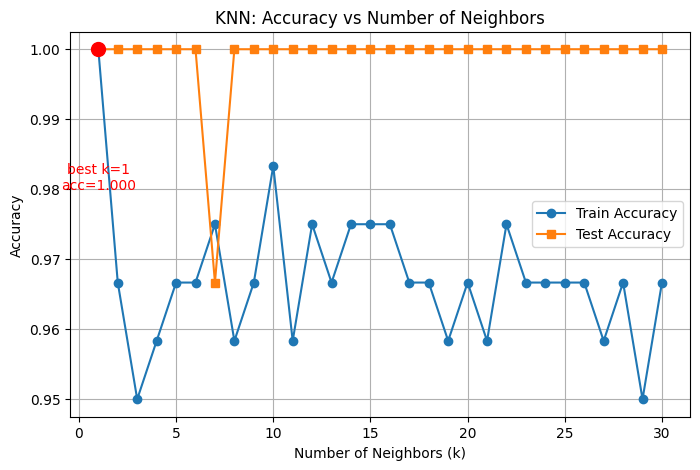

k=1인 경우, 모델은 가장 가까운 단 하나의 점만 참고하여 판단하기 때문에
데이터의 전반적인 패턴을 학습하지 못하고 과적합 상태가 된다.
이로 인해 테스트 데이터에서는 잘못 분류될 가능성이 높아진다.

k=3~5 구간에서는 Train/Test 정확도가 모두 높게 유지되어
모델이 복잡하지 않으면서도 안정적인 일반화 성능을 보인다.

k가 커질수록 Train Accuracy는 점차 감소하고, 일부 구간에서 성능이 변동되지만
Test Accuracy는 완만하게 유지된다.
이는 Iris 데이터셋이 클래스 간 구분이 명확한 쉬운 데이터이기 때문에
대부분의 k 구간에서 1.0에 가까운 높은 정확도를 보인 것으로 해석된다.